# Dataset

In [ ]:
import pandas as pd

df1 = pd.read_csv('indo_bahrain.csv')
df2 = pd.read_csv('bahrain.csv')
df3 = pd.read_csv('timnas.csv')

df1.info(), df2.info(), df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      42 non-null     int64 
 1   created_at               42 non-null     object
 2   favorite_count           42 non-null     int64 
 3   full_text                42 non-null     object
 4   id_str                   42 non-null     int64 
 5   image_url                14 non-null     object
 6   in_reply_to_screen_name  12 non-null     object
 7   lang                     42 non-null     object
 8   location                 17 non-null     object
 9   quote_count              42 non-null     int64 
 10  reply_count              42 non-null     int64 
 11  retweet_count            42 non-null     int64 
 12  tweet_url                42 non-null     object
 13  user_id_str              42 non-null     int64 
 14  username                 42 non-null     obj

(None, None, None)

In [ ]:
# Merge dataset
df_merged = pd.concat([df1, df2, df3], ignore_index=True)
df_merged

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1845605593274564705,Sun Oct 13 23:20:37 +0000 2024,0,Pos Pasukan UNIFIL PBB Lebanon diserang Yahudi...,1845605593274564705,https://pbs.twimg.com/media/GZznGrmacAAwL32.png,NaN,in,NaN,0,0,0,https://x.com/BukuTerbit/status/18456055932745...,1302393835532644353,BukuTerbit
1,1845605505395564797,Sun Oct 13 23:20:16 +0000 2024,0,Bahrain vs Indonesia #AFCMafia,1845605505395564797,NaN,NaN,in,NaN,0,0,0,https://x.com/rahabav_joseph/status/1845605505...,4857760106,rahabav_joseph
2,1845605047562043618,Sun Oct 13 23:18:27 +0000 2024,0,@idextratime @panditfootball ini akun pendukun...,1845605047562043618,NaN,idextratime,in,"Karanganyar, Indonesia",0,0,0,https://x.com/tono_on/status/1845605047562043618,222842543,tono_on
3,1845603678008582344,Sun Oct 13 23:13:01 +0000 2024,15,Terima kasih Presiden Joko Widodo. Ungkapan te...,1845603678008582344,https://pbs.twimg.com/ext_tw_video_thumb/18456...,NaN,in,"DKI Jakarta, Indonesia",0,4,15,https://x.com/rasa2086/status/1845603678008582344,1290494259791933443,rasa2086
4,1845603646161174668,Sun Oct 13 23:12:53 +0000 2024,0,AFC Tanggapi Protes Indonesia Laporan Wasit La...,1845603646161174668,NaN,NaN,in,"Kota Bontang, Kalimantan Timur",0,0,0,https://x.com/pranaladotco/status/184560364616...,1256110480994656256,pranaladotco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,1845571946999960037,Sun Oct 13 21:06:55 +0000 2024,0,Ini 4 Pemain Perwakilan Persib Dipanggil Timna...,1845571946999960037,NaN,NaN,in,NaN,0,0,0,https://x.com/wahyu_jayadi666/status/184557194...,1698690594007302144,wahyu_jayadi666
461,1845080046136103096,Sun Oct 13 21:05:58 +0000 2024,0,@BebySoSweet Jangan kau bawa sakit jiwa mu dal...,1845571705877807497,NaN,BebySoSweet,in,NaN,0,0,0,https://x.com/budibuir/status/1845571705877807497,1600363433748090880,budibuir
462,1214720450221215744,Sun Oct 13 21:05:25 +0000 2024,0,@CoachJustinL Hezbullah timnas mana? Apakah in...,1845571566517772544,NaN,CoachJustinL,in,NaN,0,0,0,https://x.com/han_rnarn/status/184557156651777...,1350466729705496576,han_rnarn
463,1845502295297114519,Sun Oct 13 21:03:30 +0000 2024,0,@recehtapisayng jual agama paling laku,1845571084818805221,NaN,recehtapisayng,in,INDONESIA,0,0,0,https://x.com/squatgaruda/status/1845571084818...,474998753,squatgaruda


# Preprocessing

In [ ]:
import sys
!{sys.executable} -m pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 18.5 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=b8f2b743c0d8d368d906afe19fc056aa61deacc441df58dc858a387fcd2e97aa
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
import re
import nltk
import swifter
import string
import pandas as pd
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Read Data

In [ ]:
df = df_merged.copy()
df.head(10)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1845605593274564705,Sun Oct 13 23:20:37 +0000 2024,0,Pos Pasukan UNIFIL PBB Lebanon diserang Yahudi...,1845605593274564705,https://pbs.twimg.com/media/GZznGrmacAAwL32.png,NaN,in,NaN,0,0,0,https://x.com/BukuTerbit/status/18456055932745...,1302393835532644353,BukuTerbit
1,1845605505395564797,Sun Oct 13 23:20:16 +0000 2024,0,Bahrain vs Indonesia #AFCMafia,1845605505395564797,NaN,NaN,in,NaN,0,0,0,https://x.com/rahabav_joseph/status/1845605505...,4857760106,rahabav_joseph
2,1845605047562043618,Sun Oct 13 23:18:27 +0000 2024,0,@idextratime @panditfootball ini akun pendukun...,1845605047562043618,NaN,idextratime,in,"Karanganyar, Indonesia",0,0,0,https://x.com/tono_on/status/1845605047562043618,222842543,tono_on
3,1845603678008582344,Sun Oct 13 23:13:01 +0000 2024,15,Terima kasih Presiden Joko Widodo. Ungkapan te...,1845603678008582344,https://pbs.twimg.com/ext_tw_video_thumb/18456...,NaN,in,"DKI Jakarta, Indonesia",0,4,15,https://x.com/rasa2086/status/1845603678008582344,1290494259791933443,rasa2086
4,1845603646161174668,Sun Oct 13 23:12:53 +0000 2024,0,AFC Tanggapi Protes Indonesia Laporan Wasit La...,1845603646161174668,NaN,NaN,in,"Kota Bontang, Kalimantan Timur",0,0,0,https://x.com/pranaladotco/status/184560364616...,1256110480994656256,pranaladotco
5,1845603612216692845,Sun Oct 13 23:12:45 +0000 2024,11,BIBI SYAHPUTRA Ketua Forum Pemuda Indonesia-FP...,1845603612216692845,https://pbs.twimg.com/ext_tw_video_thumb/18456...,NaN,in,"Jawa Timur, Indonesia",0,4,11,https://x.com/Hansunriko/status/18456036122166...,1349266626844061696,Hansunriko
6,1845603591408722182,Sun Oct 13 23:12:40 +0000 2024,0,Netizen luar negeri bela Palestina Inilah yang...,1845603591408722182,NaN,NaN,in,NaN,0,0,0,https://x.com/BukuTerbit/status/18456035914087...,1302393835532644353,BukuTerbit
7,1845602764233245115,Sun Oct 13 23:09:23 +0000 2024,0,PSSI Bantah Klaim AFC Protes Resmi soal Wasit ...,1845602764233245115,NaN,NaN,in,NaN,0,0,0,https://x.com/mitrajakartaid/status/1845602764...,1672547571875872768,mitrajakartaid
8,1845602677054722402,Sun Oct 13 23:09:03 +0000 2024,2,daerah lain di Indonesia. Tapi KSTP menghancur...,1845602679537742136,NaN,Nidyna10,in,NaN,0,0,2,https://x.com/Nidyna10/status/1845602679537742136,1710309382293004288,Nidyna10
9,1845602677054722402,Sun Oct 13 23:09:02 +0000 2024,14,Sekarang ini yang dibutuhkan masyaraskat Papua...,1845602677054722402,https://pbs.twimg.com/media/GZzl2ghaUAAVzWt.jpg,NaN,in,NaN,1,4,14,https://x.com/Nidyna10/status/1845602677054722402,1710309382293004288,Nidyna10


# Preprocessing

In [ ]:
# Cek missing value
df.isnull().sum()

,0
conversation_id_str,0
created_at,0
favorite_count,0
full_text,0
id_str,0
image_url,369
in_reply_to_screen_name,235
lang,0
location,236
quote_count,0


In [ ]:
# Filter data bahasa Indonesia
df = df[df['lang'].isin(['in'])]

## Cleansing Data

In [ ]:
# Menghapus url/link
def remove_url(df):
  df['full_text'] = df['full_text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

remove_url(df)
df['full_text'][:5]

,full_text
0,Pos Pasukan UNIFIL PBB Lebanon diserang Yahudi...
1,Bahrain vs Indonesia #AFCMafia
2,@idextratime @panditfootball ini akun pendukun...
3,Terima kasih Presiden Joko Widodo. Ungkapan te...
4,AFC Tanggapi Protes Indonesia Laporan Wasit La...


In [ ]:
# Menghapus tanda baca
def remove_karakter(text):
  for sp in string.punctuation:
    text = text.replace(sp, " ")

  text = re.sub(r"\d+","",text)
  return text.replace('/\s\s+/g', ' ')

df['full_text'] = df['full_text'].apply(remove_karakter)
df['full_text'][:5]

,full_text
0,Pos Pasukan UNIFIL PBB Lebanon diserang Yahudi...
1,Bahrain vs Indonesia AFCMafia
2,idextratime panditfootball ini akun pendukun...
3,Terima kasih Presiden Joko Widodo Ungkapan te...
4,AFC Tanggapi Protes Indonesia Laporan Wasit La...


In [ ]:
# Menghapus emoji
def remove_emoji(text):
  regrex_pattern = re.compile(pattern = "["
    u"\U00002700-\U000027BF"  # Dingbats
    u"\U0001F600-\U0001F64F"  # Emoticons
    u"\U00002600-\U000026FF"  # Miscellaneous Symbols
    u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
    u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
    "]+", flags = re.UNICODE)
  return regrex_pattern.sub(r'',text)

df['full_text'] = df['full_text'].apply(remove_emoji)
df['full_text'][:5]

,full_text
0,Pos Pasukan UNIFIL PBB Lebanon diserang Yahudi...
1,Bahrain vs Indonesia AFCMafia
2,idextratime panditfootball ini akun pendukun...
3,Terima kasih Presiden Joko Widodo Ungkapan te...
4,AFC Tanggapi Protes Indonesia Laporan Wasit La...


## Case Folding

In [ ]:
def case_folding(data, column_name):
    data[column_name] = data[column_name].str.lower()
    return data

df = case_folding(df, 'full_text')
df['full_text'][:5]

,full_text
0,pos pasukan unifil pbb lebanon diserang yahudi...
1,bahrain vs indonesia afcmafia
2,idextratime panditfootball ini akun pendukun...
3,terima kasih presiden joko widodo ungkapan te...
4,afc tanggapi protes indonesia laporan wasit la...


## Stopword Removal

In [ ]:
def stopword_removal(data, column_name):
  stop_words = stopwords.words('indonesian')
  data[column_name] = data[column_name].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
  return data

df = stopword_removal(df, 'full_text')
df['full_text'][:5]

,full_text
0,pos pasukan unifil pbb lebanon diserang yahudi...
1,bahrain vs indonesia afcmafia
2,idextratime panditfootball akun pendukung wasi...
3,terima kasih presiden joko widodo ungkapan ter...
4,afc tanggapi protes indonesia laporan wasit la...


## Stemming

In [ ]:
# Mengubah menjadi kata dasar
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Daftar kata-kata yang ingin dipertahankan tanpa stemming
keep_words = ['pemilu']

def stemming(content):
    # Memecah konten menjadi kata-kata
    words = content.split()
    # Stemming pada setiap kata
    stemmed_words = [stemmer.stem(word) if word not in keep_words else word for word in words]
    # Merging
    return " ".join(stemmed_words)

df['full_text'] = df['full_text'].apply(stemming)
df['full_text'][:5]

,full_text
0,pos pasu unifil pbb lebanon serang yahudi zion...
1,bahrain vs indonesia afcmafia
2,idextratime panditfootball akun dukung wasit b...
3,terima kasih presiden joko widodo ungkap terim...
4,afc tanggap protes indonesia lapor wasit laga ...


## Removing words

In [ ]:
words_to_remove = ['http', 'https', 'co', 'com', 't', 'manchester', 'united']
pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'

df['full_text'] = df['full_text'].str.replace(pattern, '', regex=True, case=False)
df['full_text'] = df['full_text'].str.strip()

# Saving Output

In [ ]:
df.to_excel('data_afterPreprocessing.xlsx', index=False)
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1845605593274564705,Sun Oct 13 23:20:37 +0000 2024,0,pos pasu unifil pbb lebanon serang yahudi zion...,1845605593274564705,https://pbs.twimg.com/media/GZznGrmacAAwL32.png,NaN,in,NaN,0,0,0,https://x.com/BukuTerbit/status/18456055932745...,1302393835532644353,BukuTerbit
1,1845605505395564797,Sun Oct 13 23:20:16 +0000 2024,0,bahrain vs indonesia afcmafia,1845605505395564797,NaN,NaN,in,NaN,0,0,0,https://x.com/rahabav_joseph/status/1845605505...,4857760106,rahabav_joseph
2,1845605047562043618,Sun Oct 13 23:18:27 +0000 2024,0,idextratime panditfootball akun dukung wasit b...,1845605047562043618,NaN,idextratime,in,"Karanganyar, Indonesia",0,0,0,https://x.com/tono_on/status/1845605047562043618,222842543,tono_on
3,1845603678008582344,Sun Oct 13 23:13:01 +0000 2024,15,terima kasih presiden joko widodo ungkap terim...,1845603678008582344,https://pbs.twimg.com/ext_tw_video_thumb/18456...,NaN,in,"DKI Jakarta, Indonesia",0,4,15,https://x.com/rasa2086/status/1845603678008582344,1290494259791933443,rasa2086
4,1845603646161174668,Sun Oct 13 23:12:53 +0000 2024,0,afc tanggap protes indonesia lapor wasit laga ...,1845603646161174668,NaN,NaN,in,"Kota Bontang, Kalimantan Timur",0,0,0,https://x.com/pranaladotco/status/184560364616...,1256110480994656256,pranaladotco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,1845571946999960037,Sun Oct 13 21:06:55 +0000 2024,0,main wakil persib panggil timnas indonesia fif...,1845571946999960037,NaN,NaN,in,NaN,0,0,0,https://x.com/wahyu_jayadi666/status/184557194...,1698690594007302144,wahyu_jayadi666
461,1845080046136103096,Sun Oct 13 21:05:58 +0000 2024,0,bebysosweet kau bawa sakit jiwa mu sportivitas...,1845571705877807497,NaN,BebySoSweet,in,NaN,0,0,0,https://x.com/budibuir/status/1845571705877807497,1600363433748090880,budibuir
462,1214720450221215744,Sun Oct 13 21:05:25 +0000 2024,0,coachjustinl hezbullah timnas pulitik anak bola,1845571566517772544,NaN,CoachJustinL,in,NaN,0,0,0,https://x.com/han_rnarn/status/184557156651777...,1350466729705496576,han_rnarn
463,1845502295297114519,Sun Oct 13 21:03:30 +0000 2024,0,recehtapisayng jual agama laku,1845571084818805221,NaN,recehtapisayng,in,INDONESIA,0,0,0,https://x.com/squatgaruda/status/1845571084818...,474998753,squatgaruda


# Visualisasi

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib import cm
import numpy as np

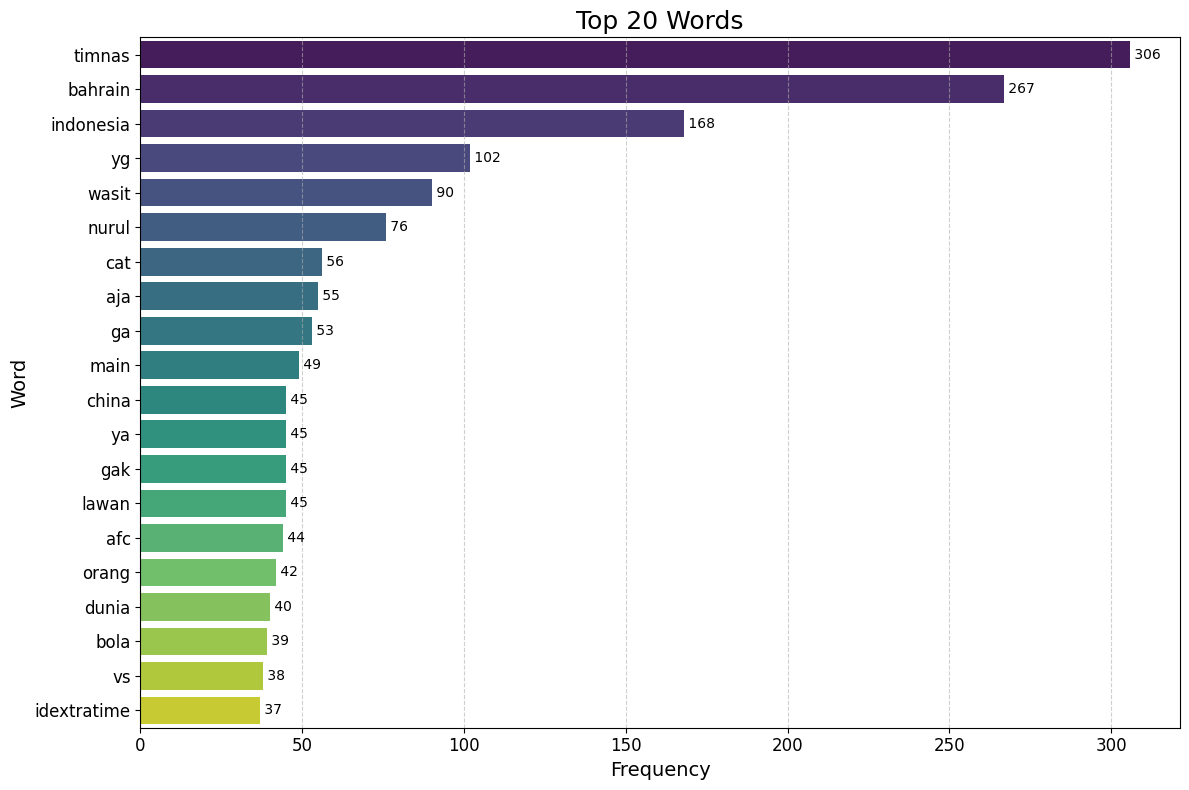

In [ ]:
all_words = ' '.join(df['full_text'].tolist())
word_freq = Counter(all_words.split())
word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['word', 'frequency'])

plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='word', data=word_freq_df, palette='viridis')

for index, value in enumerate(word_freq_df['frequency']):
    plt.text(value, index, f' {value}', va='center', fontsize=10, color='black')

plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.title('Top 20 Words', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

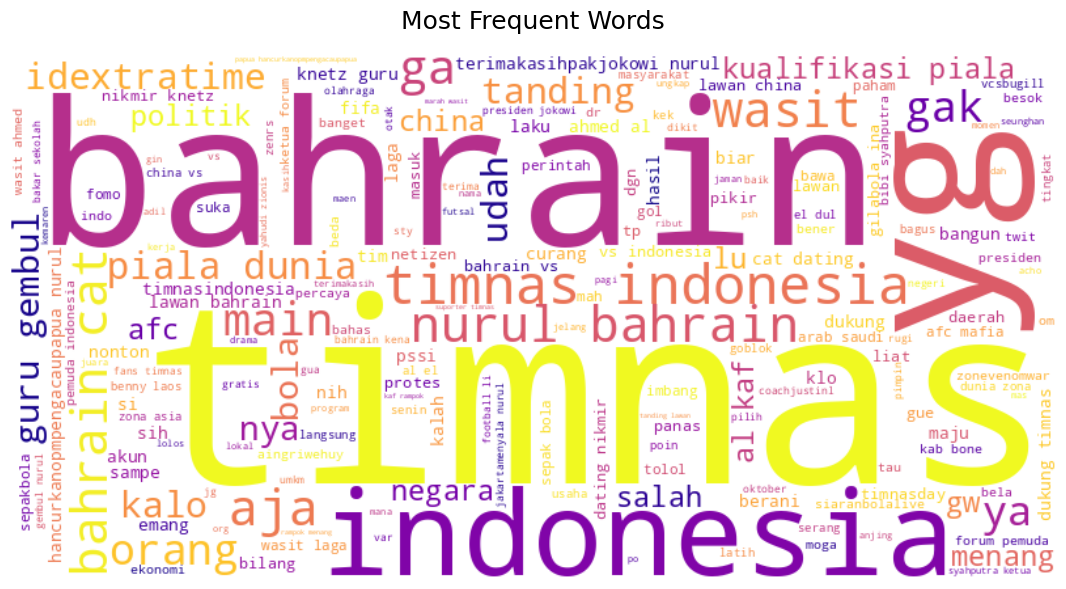

In [ ]:
cmap = ListedColormap(plt.cm.plasma(np.linspace(0, 1, 256)))

wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white',
                      colormap=cmap,
                      contour_color='black',
                      contour_width=1.5,
                      max_words=200
                     ).generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words', fontsize=18, pad=20)
plt.tight_layout()
plt.show()

# Sentimen

In [ ]:
df.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')

In [ ]:
df = df.drop(columns=['conversation_id_str', 'created_at', 'favorite_count',
                      'id_str', 'image_url','in_reply_to_screen_name', 'lang',
                      'location','quote_count', 'reply_count', 'retweet_count',
                      'tweet_url', 'user_id_str'])
df.head()

,full_text,username
0,pos pasu unifil pbb lebanon serang yahudi zion...,BukuTerbit
1,bahrain vs indonesia afcmafia,rahabav_joseph
2,idextratime panditfootball akun dukung wasit b...,tono_on
3,terima kasih presiden joko widodo ungkap terim...,rasa2086
4,afc tanggap protes indonesia lapor wasit laga ...,pranaladotco


In [ ]:
!pip install textblob
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=cb87dff829f586f583b578362b5698aa3b98177543ea52d016a28defd272cd10
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


In [ ]:
!pip install ace_tools

In [ ]:
from textblob import TextBlob
from googletrans import Translator

translator = Translator()
def translate_and_analyze(text):
    try:
        # Translate
        translated = translator.translate(text, dest='en').text
        blob = TextBlob(translated)
        # Calculate polarity
        polarity = blob.sentiment.polarity
        return translated, polarity
    except Exception as e:
        return text, 0  # Translation fails

df['translated_text'], df['polarity'] = zip(*df['full_text'].apply(translate_and_analyze))
df['sentiment'] = df['polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
print(df)

                                             full_text         username  \
0    pos pasu unifil pbb lebanon serang yahudi zion...       BukuTerbit   
1                        bahrain vs indonesia afcmafia   rahabav_joseph   
2    idextratime panditfootball akun dukung wasit b...          tono_on   
3    terima kasih presiden joko widodo ungkap terim...         rasa2086   
4    afc tanggap protes indonesia lapor wasit laga ...     pranaladotco   
..                                                 ...              ...   
460  main wakil persib panggil timnas indonesia fif...  wahyu_jayadi666   
461  bebysosweet kau bawa sakit jiwa mu sportivitas...         budibuir   
462    coachjustinl hezbullah timnas pulitik anak bola        han_rnarn   
463                     recehtapisayng jual agama laku      squatgaruda   
464  jurnalis om bongkar hukum wasit ahmed al kaf r...        tvOneNews   

                                       translated_text  polarity sentiment  
0    Pasu Pasu Unifil 

In [ ]:
df

,full_text,username,translated_text,polarity,sentiment
0,pos pasu unifil pbb lebanon serang yahudi zion...,BukuTerbit,Pasu Pasu Unifil UN Lebanon Serang Jewish Zion...,0.400000,Positive
1,bahrain vs indonesia afcmafia,rahabav_joseph,bahrain vs indonesia afcmafia,0.000000,Negative
2,idextratime panditfootball akun dukung wasit b...,tono_on,Idextratime Panditfootball Account Support Ref...,0.000000,Negative
3,terima kasih presiden joko widodo ungkap terim...,rasa2086,"Thank you President Joko Widodo, thank you, th...",0.200000,Positive
4,afc tanggap protes indonesia lapor wasit laga ...,pranaladotco,AFC Response Protest Indonesia reports the ref...,0.100000,Positive
...,...,...,...,...,...
460,main wakil persib panggil timnas indonesia fif...,wahyu_jayadi666,Playing Deputy Persib Calls the Indonesian Nat...,0.000000,Negative
461,bebysosweet kau bawa sakit jiwa mu sportivitas...,budibuir,bebysosweet you bring your mental illness spor...,-0.216667,Negative
462,coachjustinl hezbullah timnas pulitik anak bola,han_rnarn,coachjustinl hizbullah national team politics,0.000000,Negative
463,recehtapisayng jual agama laku,squatgaruda,Renehtapisayng Selling Religion,0.000000,Negative


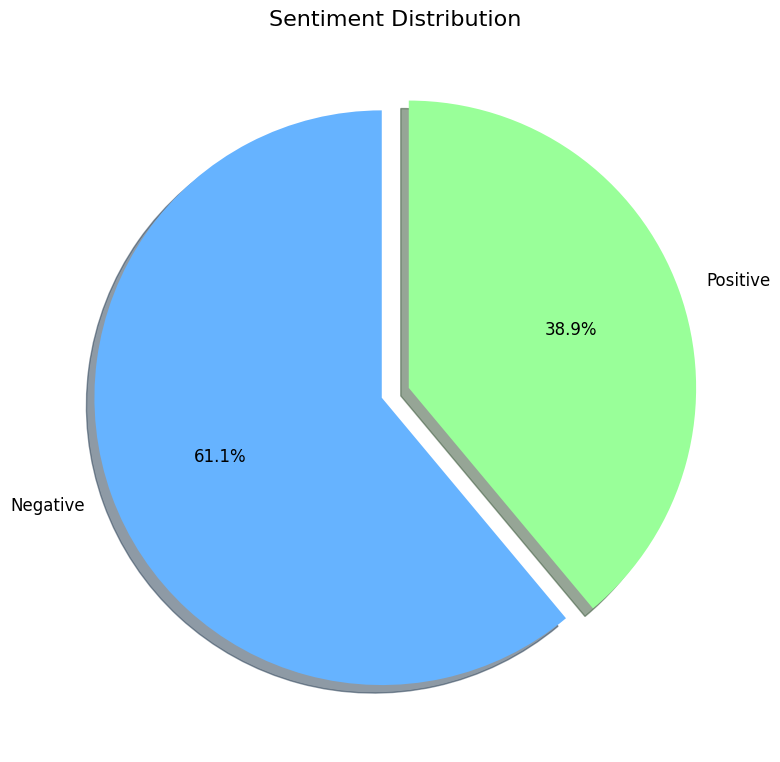

In [ ]:
sentiment_counts = df['sentiment'].value_counts()
colors = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99']

plt.figure(figsize=(8, 8))
explode = [0.05] * len(sentiment_counts)

plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 12})

plt.title('Sentiment Distribution', fontsize=16)
plt.tight_layout()

plt.show()


In [ ]:
df.to_excel('data_formodeling.xlsx', index=False)

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout
from sklearn.metrics import accuracy_score

In [ ]:
df_modeling = df.copy()
print(df_modeling.head())

                                           full_text        username  \
0  pos pasu unifil pbb lebanon serang yahudi zion...      BukuTerbit   
1                      bahrain vs indonesia afcmafia  rahabav_joseph   
2  idextratime panditfootball akun dukung wasit b...         tono_on   
3  terima kasih presiden joko widodo ungkap terim...        rasa2086   
4  afc tanggap protes indonesia lapor wasit laga ...    pranaladotco   

                                     translated_text  polarity sentiment  
0  Pasu Pasu Unifil UN Lebanon Serang Jewish Zion...       0.4  Positive  
1                      bahrain vs indonesia afcmafia       0.0  Negative  
2  Idextratime Panditfootball Account Support Ref...       0.0  Negative  
3  Thank you President Joko Widodo, thank you, th...       0.2  Positive  
4  AFC Response Protest Indonesia reports the ref...       0.1  Positive  


In [ ]:
df_modeling['sentiment'] = df_modeling['sentiment'].map({'Positive': 1, 'Negative': 0})
df_modeling

,full_text,username,translated_text,polarity,sentiment
0,pos pasu unifil pbb lebanon serang yahudi zion...,BukuTerbit,Pasu Pasu Unifil UN Lebanon Serang Jewish Zion...,0.400000,1
1,bahrain vs indonesia afcmafia,rahabav_joseph,bahrain vs indonesia afcmafia,0.000000,0
2,idextratime panditfootball akun dukung wasit b...,tono_on,Idextratime Panditfootball Account Support Ref...,0.000000,0
3,terima kasih presiden joko widodo ungkap terim...,rasa2086,"Thank you President Joko Widodo, thank you, th...",0.200000,1
4,afc tanggap protes indonesia lapor wasit laga ...,pranaladotco,AFC Response Protest Indonesia reports the ref...,0.100000,1
...,...,...,...,...,...
460,main wakil persib panggil timnas indonesia fif...,wahyu_jayadi666,Playing Deputy Persib Calls the Indonesian Nat...,0.000000,0
461,bebysosweet kau bawa sakit jiwa mu sportivitas...,budibuir,bebysosweet you bring your mental illness spor...,-0.216667,0
462,coachjustinl hezbullah timnas pulitik anak bola,han_rnarn,coachjustinl hizbullah national team politics,0.000000,0
463,recehtapisayng jual agama laku,squatgaruda,Renehtapisayng Selling Religion,0.000000,0


In [ ]:
# Tokenization
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(df_modeling['full_text'].values)
X = tokenizer.texts_to_sequences(df_modeling['full_text'].values)
X = pad_sequences(X, maxlen=max_len)

In [ ]:
y = df_modeling['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# LSTM model
def lstm():
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=max_len))
    model.add(LSTM(units=32, activation='relu', return_sequences=True))
    model.add(LSTM(units=32))
    model.add(Dropout(0.8))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# GRU model
def gru():
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=max_len))
    model.add(GRU(units=32, activation='relu', return_sequences=True))
    model.add(GRU(units=32))
    model.add(Dropout(0.8))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
lstm_model = lstm()
lstm_history = lstm_model.fit(X_train, y_train,
                              epochs=25, batch_size=64,
                              validation_data=(X_test, y_test),
                              verbose=2)

lstm_pred = (lstm_model.predict(X_test) > 0.5).astype("int32")
lstm_accuracy = accuracy_score(y_test, lstm_pred)
print(f"LSTM Model Accuracy: {lstm_accuracy:.4f}")

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


6/6 - 7s - 1s/step - accuracy: 0.5780 - loss: 0.6788 - val_accuracy: 0.6129 - val_loss: 0.6513
Epoch 2/25
6/6 - 1s - 221ms/step - accuracy: 0.5995 - loss: 0.6511 - val_accuracy: 0.6129 - val_loss: 0.6283
Epoch 3/25
6/6 - 1s - 206ms/step - accuracy: 0.6102 - loss: 0.6360 - val_accuracy: 0.6129 - val_loss: 0.6237
Epoch 4/25
6/6 - 1s - 107ms/step - accuracy: 0.5941 - loss: 0.6274 - val_accuracy: 0.6559 - val_loss: 0.6187
Epoch 5/25
6/6 - 1s - 209ms/step - accuracy: 0.6478 - loss: 0.6260 - val_accuracy: 0.6774 - val_loss: 0.6157
Epoch 6/25
6/6 - 1s - 208ms/step - accuracy: 0.6720 - loss: 0.6182 - val_accuracy: 0.6774 - val_loss: 0.6096
Epoch 7/25
6/6 - 1s - 109ms/step - accuracy: 0.6962 - loss: 0.6231 - val_accuracy: 0.6344 - val_loss: 0.6177
Epoch 8/25
6/6 - 1s - 208ms/step - accuracy: 0.7124 - loss: 0.6104 - val_accuracy: 0.6667 - val_loss: 0.6078
Epoch 9/25
6/6 - 1s - 107ms/step - accuracy: 0.7419 - loss: 0.5995 - val_accuracy: 0.6559 - val_loss: 0.6065
Epoch 10/25
6/6 - 1s - 109ms/step

In [ ]:
lstm_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 32)             │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,337,924 (5.10 MB)

 Trainable params: 668,961 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 668,963 (2.55 MB)

In [ ]:
gru_model = gru()
gru_history = gru_model.fit(X_train, y_train,
                            epochs=25, batch_size=64,
                            validation_data=(X_test, y_test),
                            verbose=2)

gru_pred = (gru_model.predict(X_test) > 0.5).astype("int32")

gru_accuracy = accuracy_score(y_test, gru_pred)
print(f"GRU Model Accuracy: {gru_accuracy:.4f}")

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


6/6 - 5s - 916ms/step - accuracy: 0.5806 - loss: 0.6866 - val_accuracy: 0.6129 - val_loss: 0.6792
Epoch 2/25
6/6 - 2s - 338ms/step - accuracy: 0.6102 - loss: 0.6726 - val_accuracy: 0.6129 - val_loss: 0.6679
Epoch 3/25
6/6 - 1s - 131ms/step - accuracy: 0.6102 - loss: 0.6578 - val_accuracy: 0.6129 - val_loss: 0.6562
Epoch 4/25
6/6 - 1s - 188ms/step - accuracy: 0.6102 - loss: 0.6464 - val_accuracy: 0.6129 - val_loss: 0.6478
Epoch 5/25
6/6 - 1s - 238ms/step - accuracy: 0.6263 - loss: 0.6258 - val_accuracy: 0.6129 - val_loss: 0.6279
Epoch 6/25
6/6 - 2s - 338ms/step - accuracy: 0.6237 - loss: 0.5950 - val_accuracy: 0.6237 - val_loss: 0.6197
Epoch 7/25
6/6 - 1s - 211ms/step - accuracy: 0.6640 - loss: 0.5843 - val_accuracy: 0.6129 - val_loss: 0.6139
Epoch 8/25
6/6 - 1s - 211ms/step - accuracy: 0.7312 - loss: 0.5536 - val_accuracy: 0.6022 - val_loss: 0.6011
Epoch 9/25
6/6 - 1s - 133ms/step - accuracy: 0.8387 - loss: 0.5156 - val_accuracy: 0.6452 - val_loss: 0.5917
Epoch 10/25
6/6 - 1s - 132ms/s

In [ ]:
gru_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 100, 32)             │          15,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,323,844 (5.05 MB)

 Trainable params: 661,921 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 661,923 (2.53 MB)

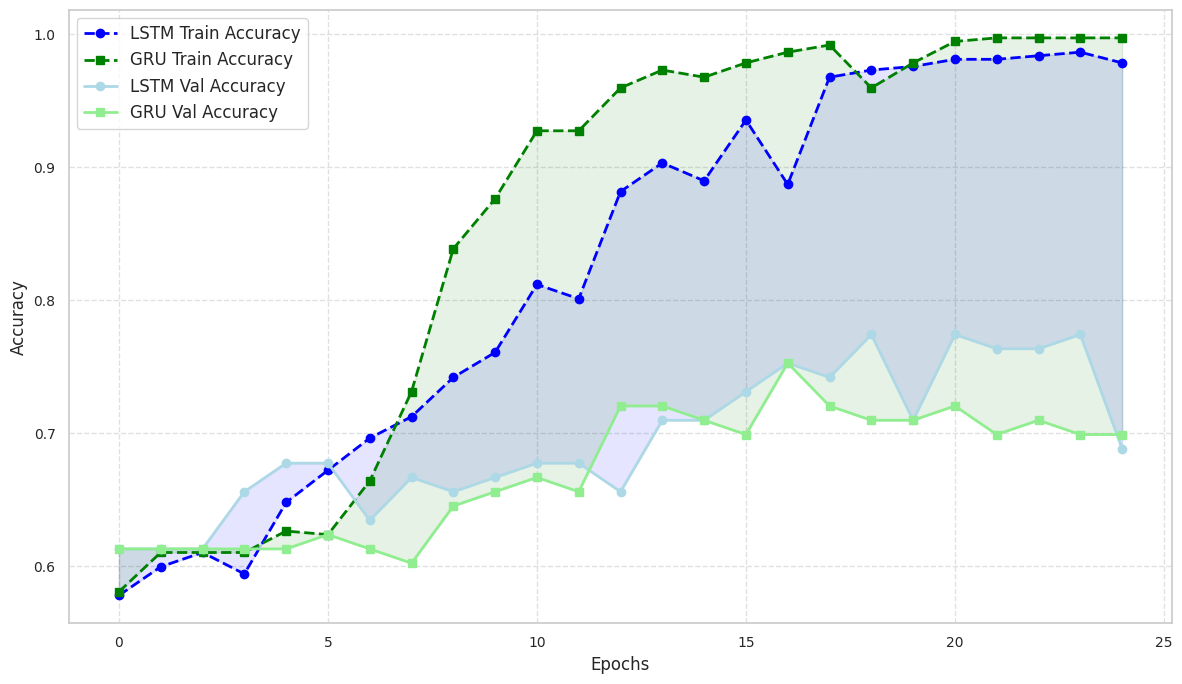

In [ ]:
def plot_comparison(lstm_history, gru_history):
    plt.figure(figsize=(12, 7))
    sns.set(style="whitegrid")
    plt.plot(lstm_history.history['accuracy'], label='LSTM Train Accuracy',
             color='blue', linestyle='--', marker='o', linewidth=2)
    plt.plot(gru_history.history['accuracy'], label='GRU Train Accuracy',
             color='green', linestyle='--', marker='s', linewidth=2)

    plt.plot(lstm_history.history['val_accuracy'], label='LSTM Val Accuracy',
             color='lightblue', linestyle='-', marker='o', linewidth=2)
    plt.plot(gru_history.history['val_accuracy'], label='GRU Val Accuracy',
             color='lightgreen', linestyle='-', marker='s', linewidth=2)

    plt.title('', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)

    plt.fill_between(range(len(lstm_history.history['accuracy'])),
                     lstm_history.history['accuracy'], lstm_history.history['val_accuracy'],
                     color='blue', alpha=0.1)
    plt.fill_between(range(len(gru_history.history['accuracy'])),
                     gru_history.history['accuracy'], gru_history.history['val_accuracy'],
                     color='green', alpha=0.1)

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_comparison(lstm_history, gru_history)